# COGS 118A Group 035 Wi23 - Neural Network with Tensorflow-Keras
### Group Memebers:
<ul >
  <li style="padding-left: 20px;"> Jamie Wei (A15921963) </li>
  <li style="padding-left: 20px;"> Nicole Rangan (A15011222) </li>
  <li style="padding-left: 20px;"> Sarita Raghunath (A16425750) </li>
  <li style="padding-left: 20px;"> Zehong Li (A15852954) </li>
</ul>


**NOTICE! Running our model requires Tensorflow. The development is constructed with Pip (22.2), Python (3.9.13), and Tensorflow (2.11.0)**

In [4]:
# %pip install tensorflow==2.11.*

In [5]:
# %pip install -q -U keras-tuner

In [6]:
# compatibility check
import sys
print(sys.version)
import pip
print(pip.__version__)

3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
22.2


In [25]:
# necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.preprocessing import LabelEncoder

from datetime import datetime

In [8]:
# assert library import
assert pd.__version__ >= '1.0.0'
assert np.__version__ >= '1.0.0'
assert tf.__version__ >= '2.0.0'
assert plt
assert Sequential
assert Dense
assert Dropout
assert BatchNormalization
assert Adam
assert l2
assert train_test_split
assert LabelEncoder
assert kt
assert tf.__version__ >= "2.0.0"

In [9]:
# read csv
df = pd.read_csv('cleaned_data_final.csv')

# a peek at our dataset
df

,match_id,radiant_win,duration,avg_mmr,team1_hero1,team1_hero2,team1_hero3,team1_hero4,team1_hero5,team1_hero6,...,team2_hero119,team2_hero120,team2_hero121,team2_hero123,team2_hero126,team2_hero128,team2_hero129,team2_hero135,team2_hero136,team2_hero137
0,7045889918,False,2199,2607.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7045889915,True,2301,2931.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7045889913,True,2093,1942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7045889912,False,2856,4332.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7045889911,False,3539,3942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91583,6744845900,False,3297,2763.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91584,6744846112,True,1915,2882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91585,6744847011,False,2101,2159.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91586,6744847112,True,2494,2107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# turn labels to 0 and 1s
df['radiant_win'] = df['radiant_win'].replace({True: 1, False: 0})
df

,match_id,radiant_win,duration,avg_mmr,team1_hero1,team1_hero2,team1_hero3,team1_hero4,team1_hero5,team1_hero6,...,team2_hero119,team2_hero120,team2_hero121,team2_hero123,team2_hero126,team2_hero128,team2_hero129,team2_hero135,team2_hero136,team2_hero137
0,7045889918,0,2199,2607.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7045889915,1,2301,2931.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7045889913,1,2093,1942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7045889912,0,2856,4332.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7045889911,0,3539,3942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91583,6744845900,0,3297,2763.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91584,6744846112,1,1915,2882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91585,6744847011,0,2101,2159.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91586,6744847112,1,2494,2107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 4:], df[['radiant_win']], test_size=0.2, random_state=42)

In [12]:
#convert numpy arrays of training to tensors, set to tf.float32
X_train_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [13]:
X_train_tensor.shape

TensorShape([73270, 246])

In [14]:
# hyperparameter tuning dictionary that will be searched on
params = {
    'learning_rate': [0.001, 0.01],
    'hidden_layers': [1, 2, 3],
    'nodes': [32, 64],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'regularization_strength': [0.01, 0.1]
}

In [15]:
# define a function to create the Keras model
def create_model(learning_rate=0.01, hidden_layers=1, nodes=32, activation='relu', regularization_strength=0.01):
    model = Sequential()
    model.add(Dense(nodes, activation=activation, input_shape=(246,), kernel_regularizer=l2(regularization_strength)))
    model.add(BatchNormalization())
    for i in range(hidden_layers):
        model.add(Dense(nodes, activation=activation, kernel_regularizer=l2(regularization_strength)))
        model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, verbose=0)

C:\Users\Dominic\AppData\Local\Temp\ipykernel_137176\3625288076.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose=0)


In [16]:
# perform the grid search
grid = GridSearchCV(estimator=model, param_grid=params, cv=2, verbose=3)
grid_result = grid.fit(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=32, regularization_strength=0.01;, score=0.544 total time=   3.3s
[CV 2/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=32, regularization_strength=0.01;, score=0.542 total time=   3.1s
[CV 1/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=32, regularization_strength=0.1;, score=0.502 total time=   3.2s
[CV 2/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=32, regularization_strength=0.1;, score=0.501 total time=   3.1s
[CV 1/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=64, regularization_strength=0.01;, score=0.541 total time=   3.4s
[CV 2/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=64, regularization_strength=0.01;, score=0.547 total time=   3.2s
[CV 1/2] END activation=relu, hidden_layers=1, learning_rate=0.001, nodes=64, regularization_strengt

In [17]:
print(grid_result.best_params_)

{'activation': 'tanh', 'hidden_layers': 1, 'learning_rate': 0.001, 'nodes': 32, 'regularization_strength': 0.01}


In [18]:
best_params = grid_result.best_params_

model = create_model(learning_rate=best_params['learning_rate'], 
                     hidden_layers=best_params['hidden_layers'], 
                     nodes=best_params['nodes'], 
                     activation=best_params['activation'], 
                     regularization_strength=best_params['regularization_strength'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
2290/2290 [==============================] - 4s 1ms/step - loss: 0.8423 - accuracy: 0.5311 - val_loss: 0.6956 - val_accuracy: 0.5437
Epoch 2/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.6950 - accuracy: 0.5413 - val_loss: 0.6943 - val_accuracy: 0.5456
Epoch 3/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.6948 - accuracy: 0.5482 - val_loss: 0.6945 - val_accuracy: 0.5453
Epoch 4/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.6937 - accuracy: 0.5489 - val_loss: 0.6928 - val_accuracy: 0.5495
Epoch 5/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.6917 - accuracy: 0.5512 - val_loss: 0.6907 - val_accuracy: 0.5473
Epoch 6/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.6907 - accuracy: 0.5493 - val_loss: 0.6896 - val_accuracy: 0.5491
Epoch 7/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.6894 - accuracy: 0.5534 - val_loss: 0.6887 - val_ac

In [19]:
#evaluate test accuracy
test_loss, test_acc = model.evaluate(X_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

573/573 [==============================] - 1s 864us/step - loss: 0.6870 - accuracy: 0.5509
Test Loss: 0.6870
Test Accuracy: 0.5509


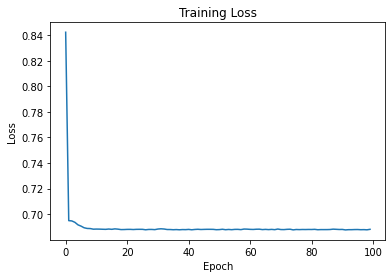

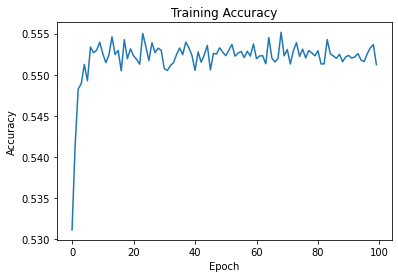

In [20]:
#training loss plot
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#training accuracy plot
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [21]:
# define a show metric function
def show_metrics(y_tr, y_te, yhat_tr, yhat_te, named):
    # accuracy scores for training and test sets
    acc_train = accuracy_score(y_tr, yhat_tr)
    acc_test = accuracy_score(y_te, yhat_te)

    print(f'training set accuracy (n={y_tr.shape[0]}): {acc_train:4.3f}')
    print(f'test set accuracy (n={y_te.shape[0]}): {acc_test:4.3f}')
    print()
    print('classificiation report on test set performance')
    print(classification_report(y_te, yhat_te, digits = 5))
    print()

    with sns.axes_style('white'):
        # confusion matrix
        ConfusionMatrixDisplay.from_predictions(y_te, yhat_te)
        plt.show()
        
        # roc-auc
        fpr, tpr, thresholds = roc_curve(y_te, yhat_te) 
        roc_auc = auc(fpr, tpr)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name=named)
        roc_display.plot()
        plt.title('ROC Curve')
        plt.show()
        
        # precision-recall auc
        precision, recall, thresholds = precision_recall_curve(y_te, yhat_te)
        pr_auc = auc(recall, precision)
        pr_display = PrecisionRecallDisplay(precision=precision, recall=recall,
                                             average_precision=pr_auc,
                                             estimator_name=named)
        pr_display.plot()
        plt.title('Precision-Recall Curve')
        plt.show()
        
        # balanced accuracy
        tn, fp, fn, tp = confusion_matrix(y_te, yhat_te).ravel()
        balanced_accuracy = (tp/(tp+fn) + tn/(tn+fp))/2
        print(f'Balanced accuracy: {balanced_accuracy:.3f}')
        
        # specificity and negative predictive value
        specificity = tn / (tn + fp)
        npv = tn / (tn + fn)
        print(f'Specificity: {specificity:.3f}')
        print(f'Negative predictive value: {npv:.3f}')
        
        # false positive and false negative rates
        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)
        print(f'False positive rate: {fpr:.3f}')
        print(f'False negative rate: {fnr:.3f}')

In [22]:
yhat_te_prob = model.predict(X_test)
yhat_te = (yhat_te_prob > 0.5).astype(int)
yhat_te

yhat_tr_prob = model.predict(X_train)
yhat_tr = (yhat_tr_prob > 0.5).astype(int)
yhat_tr

2290/2290 [==============================] - 2s 788us/step


array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [23]:
yhat_tr.shape

(73270, 1)

training set accuracy (n=73270): 0.561
test set accuracy (n=18318): 0.551

classificiation report on test set performance
              precision    recall  f1-score   support

           0    0.54270   0.58552   0.56330      9062
           1    0.56024   0.51696   0.53773      9256

    accuracy                        0.55088     18318
   macro avg    0.55147   0.55124   0.55052     18318
weighted avg    0.55156   0.55088   0.55038     18318




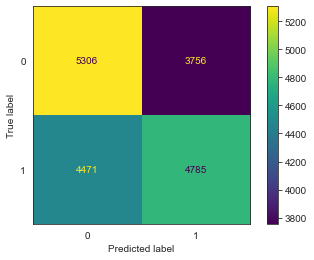

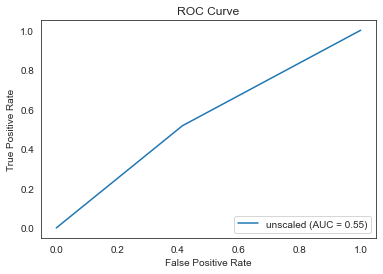

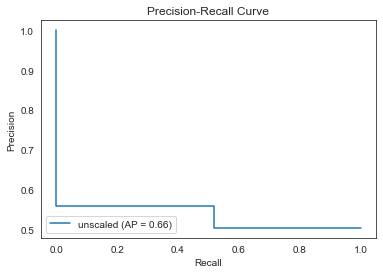

Balanced accuracy: 0.551
Specificity: 0.586
Negative predictive value: 0.543
False positive rate: 0.414
False negative rate: 0.483


In [26]:
show_metrics(y_train, y_test, yhat_tr, yhat_te, 'unscaled')